In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np 
from pathlib import Path 

%matplotlib inline

In [3]:
# Load CSV file
brewery_data_csv = Path("breweries_complete.csv")

In [4]:
# Read data file and store it in DataFrame
breweries_complete = pd.read_csv(brewery_data_csv)
breweries_complete.head()

,name,brewery_type,address_1,city,state_province,postal_code,longitude,latitude,state,zip_code,brewery_id
0,(405) Brewing Co,micro,1716 Topeka St,Norman,Oklahoma,73069-8224,-97.468182,35.257389,Oklahoma,73069,1
1,10 Barrel Brewing Co,large,1501 E St,San Diego,California,92101-6618,-117.129593,32.714813,California,92101,3
2,10 Barrel Brewing Co,large,62970 18th St,Bend,Oregon,97701-9847,-121.281706,44.086835,Oregon,97701,4
3,10 Barrel Brewing Co,large,1135 NW Galveston Ave Ste B,Bend,Oregon,97703-2465,-121.328802,44.057565,Oregon,97703,5
4,10 Barrel Brewing Co,large,1411 NW Flanders St,Portland,Oregon,97209-2620,-122.685506,45.525979,Oregon,97209,6


## Total breweries across all types per state

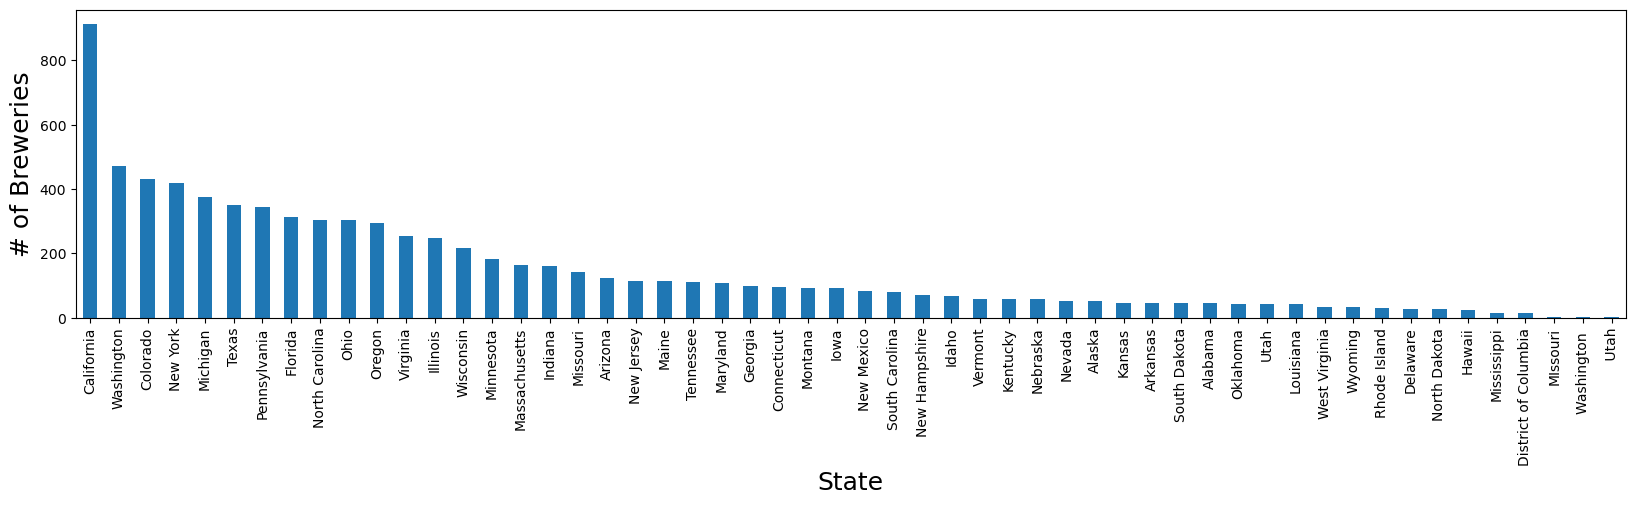

In [5]:
# Generate a bar plot showing total number of breweries by state 
brew_by_state = breweries_complete.groupby(["state_province"])["brewery_type"].count()
brew_by_state = brew_by_state.sort_values(ascending=False)
brew_by_state_df = pd.DataFrame(brew_by_state)

# Display bar plot, label x and y, apply formatting 
brew_chart = brew_by_state_df.plot(kind="bar", figsize=(20,4), legend=False)
brew_chart.set_xlabel("State", fontsize=18)
brew_chart.set_ylabel("# of Breweries", fontsize=18)

# Save an image of the chart and print it to the screen
plt.savefig("Images/breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total "open"-type breweries per state

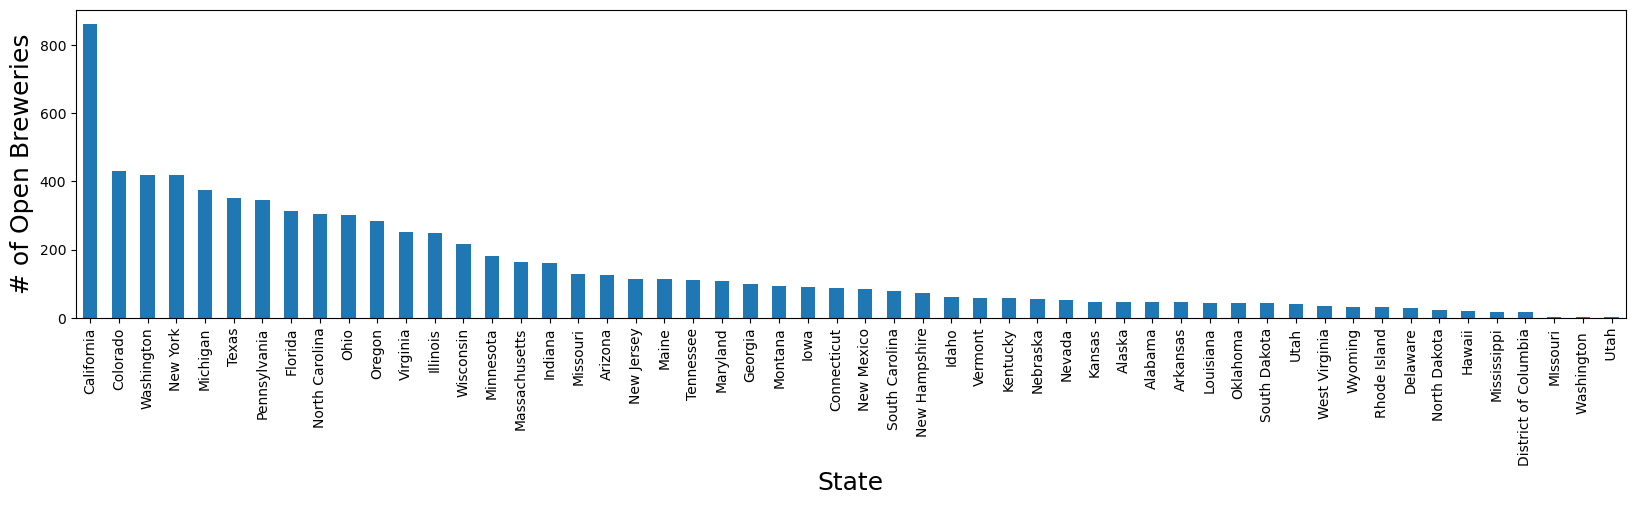

In [24]:
# Remove data of closed breweries 
open_breweries = breweries_complete[breweries_complete.brewery_type != "closed"]

# Generate a bar plot showing total number of open breweries by state 
open_brew_by_state = open_breweries.groupby(["state_province"])["brewery_type"].count()
open_brew_by_state = open_brew_by_state.sort_values(ascending=False)
open_breweries_df = pd.DataFrame(open_brew_by_state)

# Display bar plot, label x and y, apply formatting 
open_brew_chart = open_breweries_df.plot(kind="bar", figsize=(20,4), legend=False)
open_brew_chart.set_xlabel("State", fontsize=18)
open_brew_chart.set_ylabel("# of Open Breweries", fontsize=18)

# Save an image of the chart and print it to the screen
plt.savefig("Images/open_breweries_per_state.png", bbox_inches="tight")
plt.show()

## Total closed breweries per state

<function matplotlib.pyplot.show(close=None, block=None)>

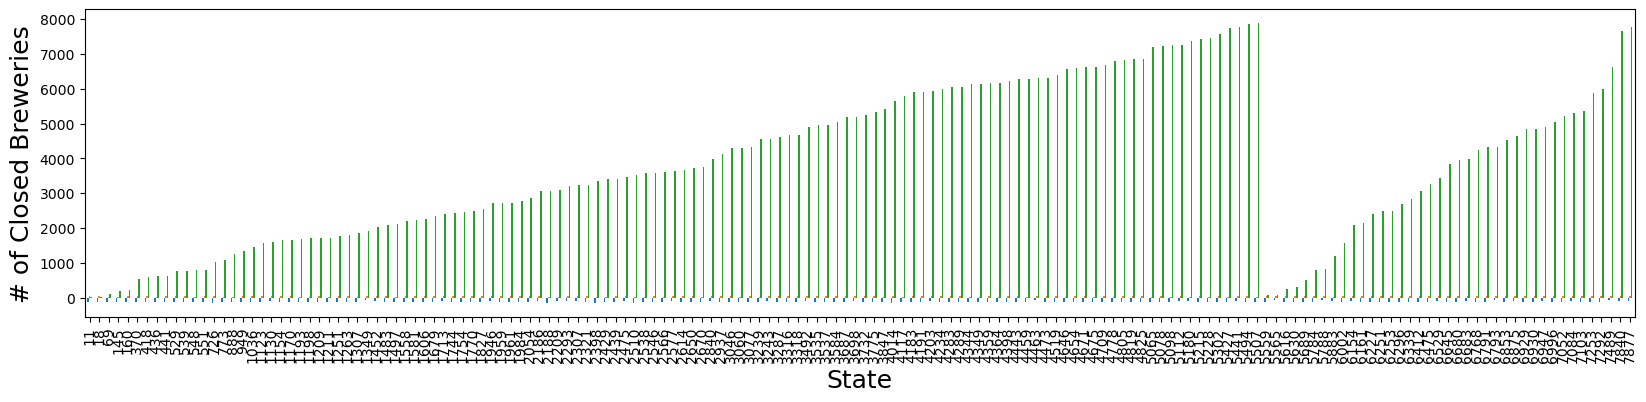

In [36]:
# Pull data for closed breweries 
closed_breweries = breweries_complete.loc[breweries_complete["brewery_type"] == "closed"]

# Generate a bar plot showing total number of closed breweries by state 
closed_brew_by_state = closed_breweries.groupby(["state_province"])["brewery_type"].count()
closed_brew_by_state = closed_brew_by_state.sort_values(ascending=False)
closed_breweries_df = pd.DataFrame(closed_brew_by_state)

# Display bar plot, label x and y, apply formatting 
closed_brew_chart = closed_breweries.plot(kind="bar", figsize=(20,4), legend=False)
closed_brew_chart.set_xlabel("State", fontsize=18)
closed_brew_chart.set_ylabel("# of Closed Breweries", fontsize=18)
plt.show